# (84100) Farnocchia orbit determination test

In [1]:
import grss
prop = grss.prop
fit = grss.fit

In [2]:
import numpy as np
np.set_printoptions(precision=40, linewidth=np.inf)

In [3]:
body_id = '84100'
init_sol, init_cov, nongrav_info = fit.get_sbdb_info(body_id)
de_kernel = 440

In [4]:
add_gaia_obs = True
optical_obs_file = None
t_min_tdb = None
t_max_tdb = None
debias_lowres = True
deweight = True
eliminate = False
num_obs_per_night = 4
verbose = True
obs_df = fit.get_optical_obs(body_id, optical_obs_file, t_min_tdb, t_max_tdb, debias_lowres, deweight, eliminate, num_obs_per_night, verbose)
obs_df = fit.add_radar_obs(obs_df, t_min_tdb, t_max_tdb, verbose)
if add_gaia_obs:
    gaia_dr = 'gaiafpr'
    obs_df = fit.add_gaia_obs(obs_df, t_min_tdb, t_max_tdb, gaia_dr, verbose)

Read in 1045 observations from the MPC.
	Filtered to 1045 observations that satisfy the time range and accepted observatory constraints.
Applying Eggl et al. (2020) debiasing scheme to the observations.
	Unknown star catalog: UNK
	No debiasing needed for 607 observations.
	Debiased 416 observations.
	No bias information for 22 observations.
Applying Vereš et al. (2017) weighting scheme to the observations.
	Using 980 CCD observations with station-specific weight rules.
Applying sqrt(N/4) deweighting scheme.
	Deweighted 164 observations.
Read in 191 Gaia observations from gaiafpr
	Filtered to 191 observations that satisfy the time range constraints.


In [5]:
n_iter_max = 10
fit_sim = fit.FitSimulation(init_sol, obs_df, init_cov, n_iter_max=n_iter_max, de_kernel=de_kernel, nongrav_info=nongrav_info)

In [6]:
fit_sim.filter_lsq()

Iteration		Unweighted RMS		Weighted RMS 		Chi-squared		Reduced Chi-squared
1			 0.392			 0.563			 783.635			 0.318
2			 0.392			 0.563			 783.094			 0.318
Converged without rejecting outliers. Starting outlier rejection now...
3			 0.371			 0.534			 704.010			 0.287
4			 0.371			 0.533			 703.228			 0.286
Converged after rejecting outliers. Rejected 5 out of 1236 optical observations.


In [7]:
fit_sim.print_summary()

Summary of the orbit fit calculations after postfit pass:
RMS unweighted: 0.37126594969961035
RMS weighted: 0.5333641748660841
chi-squared: 703.2279919715905
reduced chi-squared: 0.2863306156236118
square root of reduced chi-squared: 0.5350986970864458
--------------------------------------------------------------
Solution Time: MJD 58220.000 TDB = 2018-04-12 00:00:00.000 TDB
Solution Observation Arc: 10780.81 days (29.52 years)
--------------------------------------------------------------
Fitted Variable		Initial Value			Uncertainty			Fitted Value			Uncertainty			Change				Change (sigma)
e			2.02607101010e-01		1.40708239160e-09		2.02607101067e-01		1.41345635202e-09		+5.71593050669e-11		+0.040
q			2.17701583581e+00		4.96503178323e-09		2.17701583698e+00		4.98694666481e-09		+1.17357323859e-09		+0.235
tp			5.74179695615e+04		7.18495864059e-06		5.74179695636e+04		7.20529732076e-06		+2.13353632716e-06		+0.296
om			1.52355594385e+02		1.14608769103e-06		1.52355594399e+02		1.16868013476e-06		

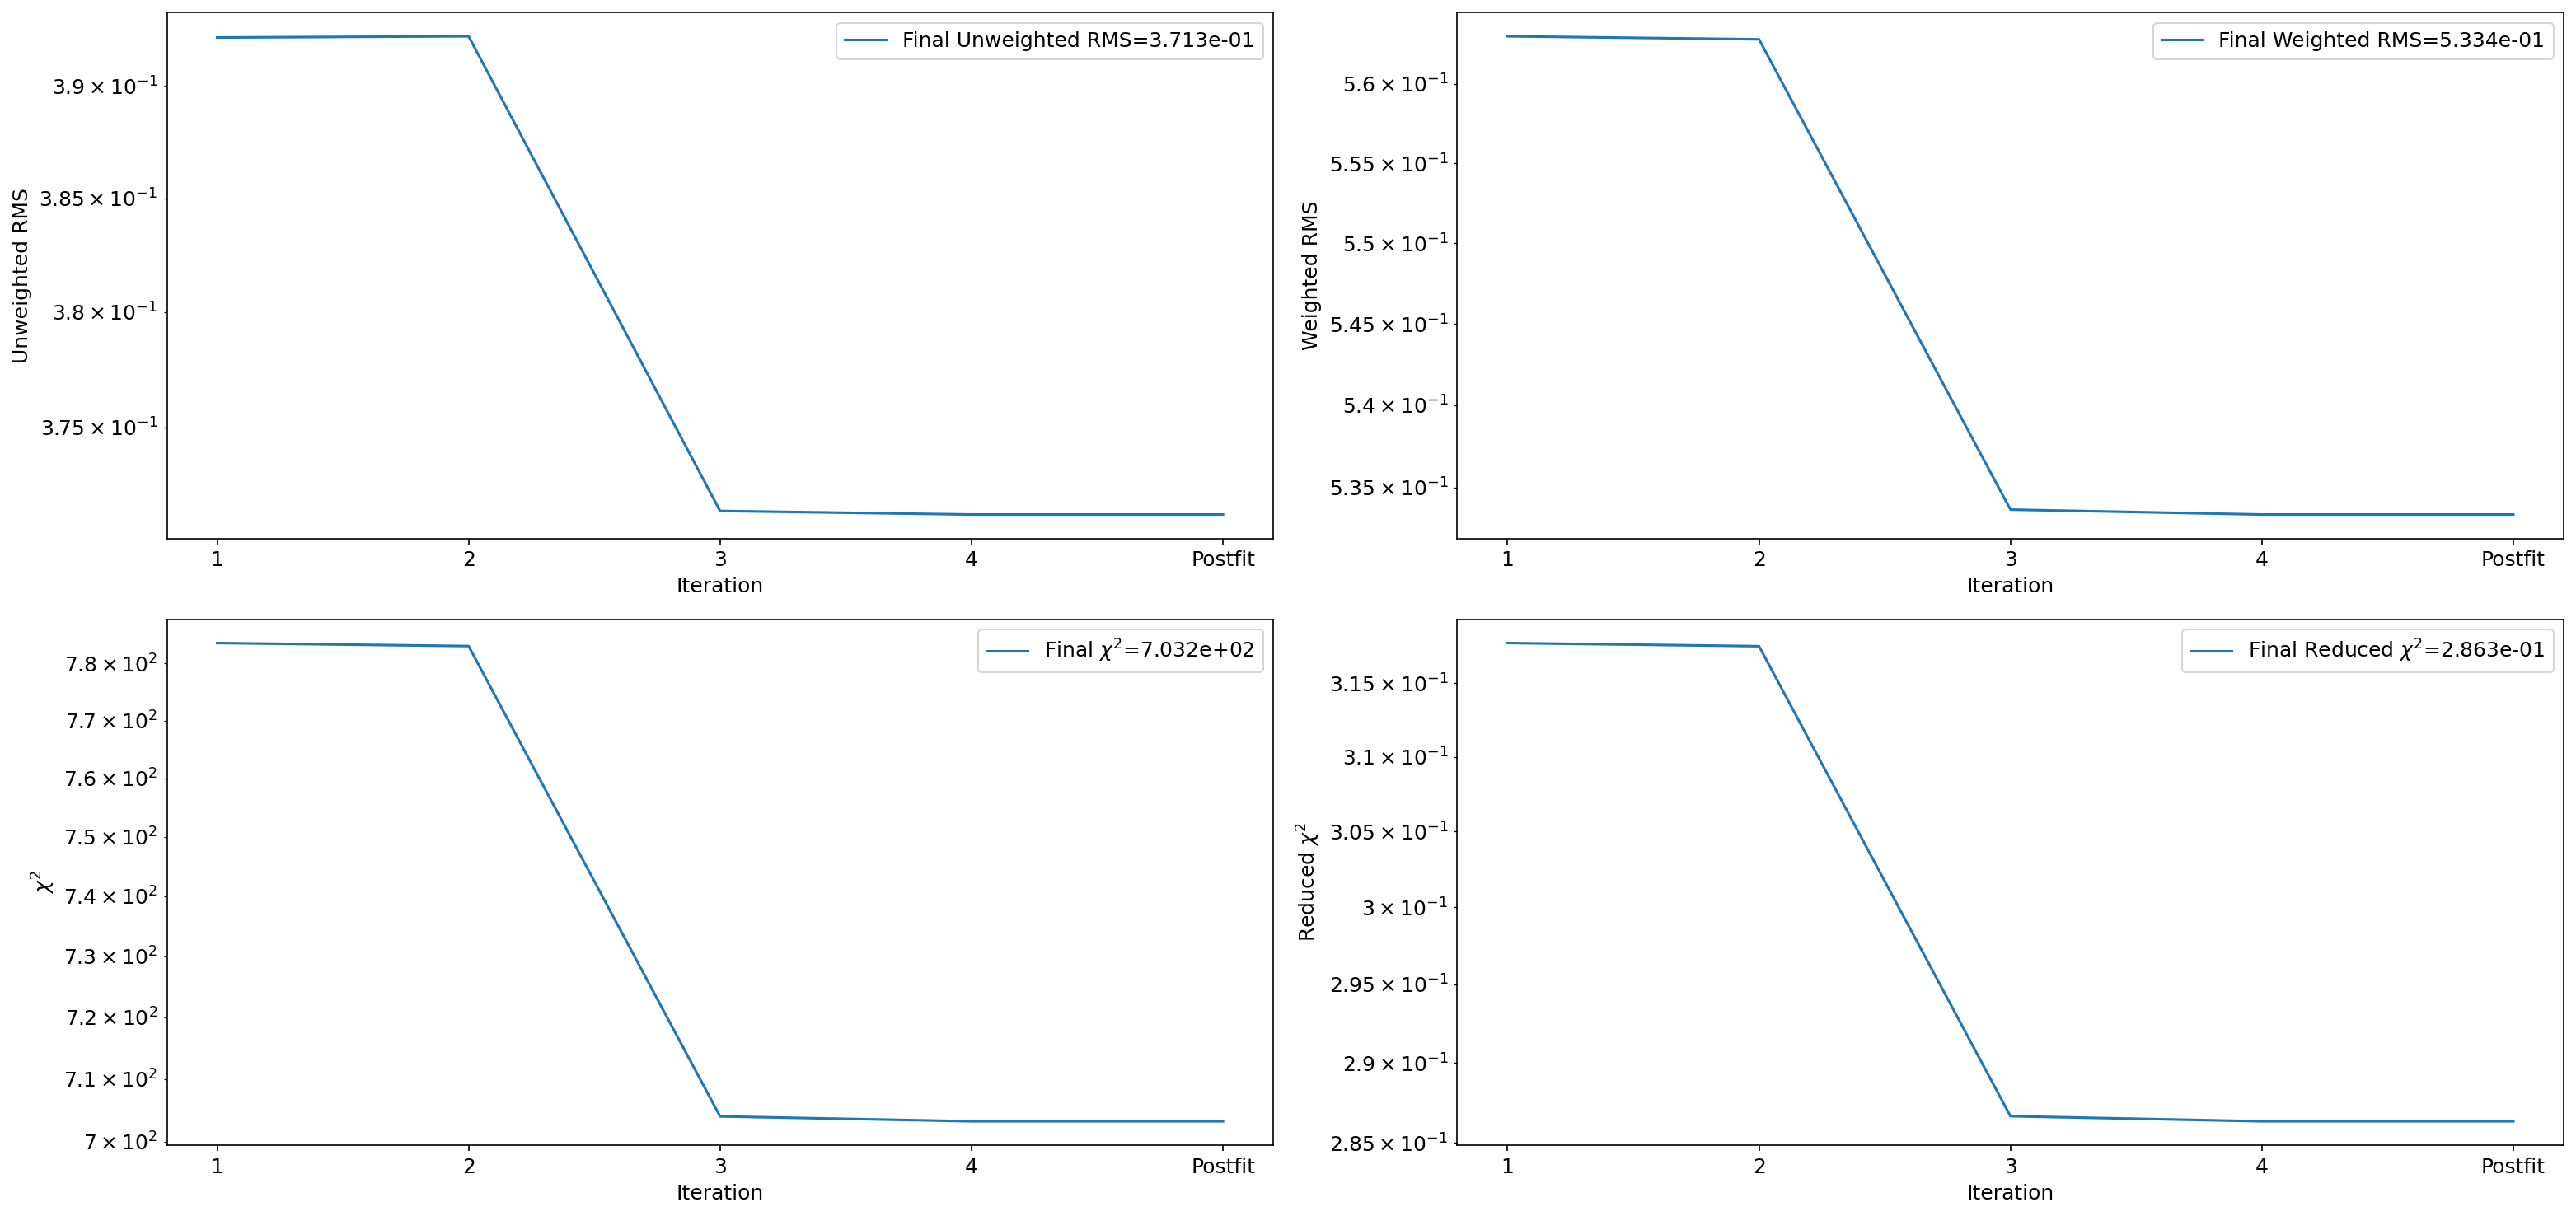

In [8]:
fit_sim.plot_summary(auto_close=True)

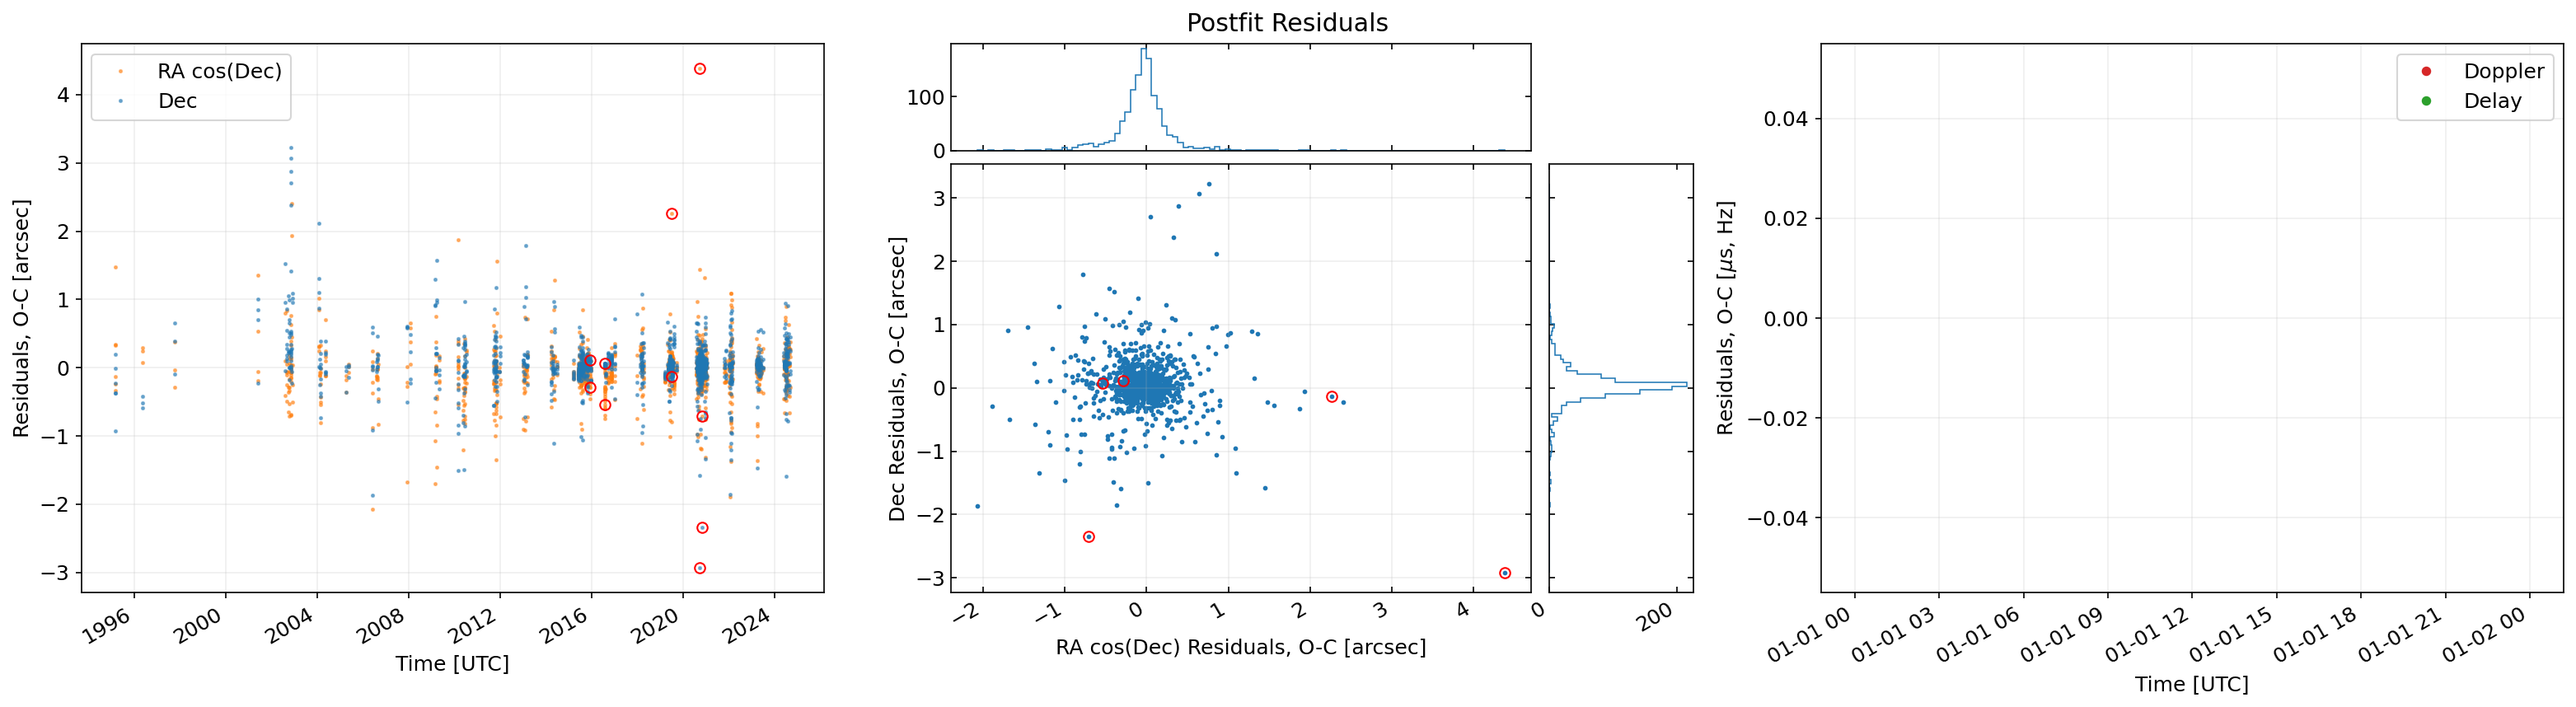

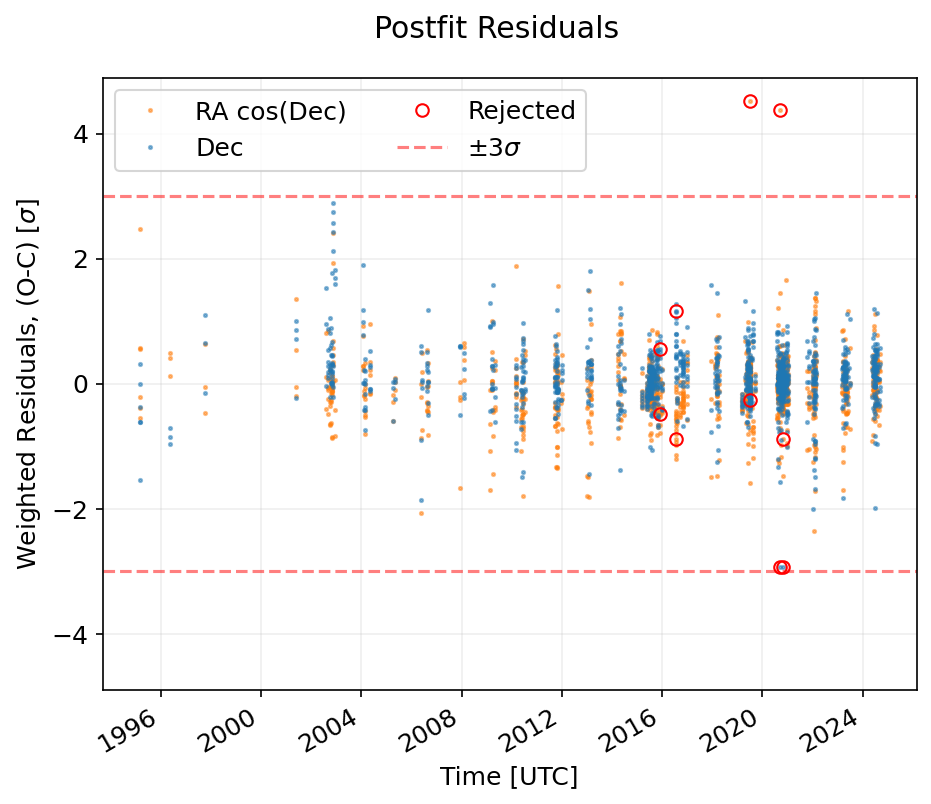

In [9]:
fit_sim.iters[-1].plot_iteration_summary(title='Postfit Residuals', auto_close=True)

In [10]:
mean_0 = np.array(list(init_sol.values())[1:])
cov_0 = init_cov
mean_f = np.array(list(fit_sim.x_nom.values()))
cov_f = fit_sim.covariance

maha_dist_f, maha_dist_0, bhattacharya, bhatt_coeff = fit.get_similarity_stats(mean_0, cov_0, mean_f, cov_f)
print(f'Mahalonobis distance between JPL and GRSS solution: {maha_dist_f:0.2f}')
print(f'Mahalonobis distance between GRSS and JPL solution: {maha_dist_0:0.2f}')
print(f'Bhattacharya distance between JPL and GRSS solution: {bhattacharya:0.4f}')
print(f'Bhattacharya coefficient between JPL and GRSS solution: {bhatt_coeff:0.4f}')

Mahalonobis distance between JPL and GRSS solution: 0.35
Mahalonobis distance between GRSS and JPL solution: 0.35
Bhattacharya distance between JPL and GRSS solution: 0.0004
Bhattacharya coefficient between JPL and GRSS solution: 0.9996


In [11]:
assert maha_dist_f < 5.0
assert maha_dist_0 < 5.0
assert bhattacharya < 0.10
assert bhatt_coeff > 0.90